# 1. Load runtime tables

In [86]:
from pathlib import Path
from os import mkdir
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cases_root_dir = Path('cases')

figures_path = Path('figures')
if not figures_path.exists():
    mkdir(figures_path)
    
samples_cases = ['04', '08', '16', 'full']
dataset_names = ['0810PADBR-1', '1405WAEXK-1', '1408MLGX6-3WGS', '1203NYJAP-1 - Tuna Scrape Outbreak']
cases_paths = [cases_root_dir / f'case-{x}' for x in samples_cases]
cases_paths

[PosixPath('cases/case-04'),
 PosixPath('cases/case-08'),
 PosixPath('cases/case-16'),
 PosixPath('cases/case-full')]

In [99]:
case_dataset_dfs = []
for case_path in cases_paths:
    for dataset in dataset_names:
        runtime_path = case_path / f'{dataset.replace(" ", "_")}-results.tsv'
        df = pd.read_csv(runtime_path, sep='\t').iloc[: , 1:]
        
        case_dataset_dfs.append(df)
        
index_info_no_meta_df = pd.concat(case_dataset_dfs)
index_info_no_meta_df[['Case', 'Dataset']] = index_info_no_meta_df['Name'].str.split(':', expand=True)
index_info_no_meta_df = index_info_no_meta_df.reset_index(drop=True)

# Drop this case since it's a duplicate of the full case (9 genomes)
index_info_no_meta_df = index_info_no_meta_df[index_info_no_meta_df['Name'] != 'case-16:1405WAEXK-1']

index_info_no_meta_df.head(3)

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset
0,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,4,40115,855,4,1634890,783.16,6.383964e+09,...,1.084998e+09,419774464.0,11571200.0,16.05,335937536.0,247717888.0,815.31,6.383964e+09,case-04,0810PADBR-1
1,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,4,40115,855,4,1634890,783.85,6.373929e+09,...,1.083941e+09,424210432.0,11587584.0,18.15,335716352.0,247451648.0,818.36,6.373929e+09,case-04,0810PADBR-1
2,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,4,40115,855,4,1634890,779.68,6.354792e+09,...,1.087934e+09,424423424.0,11567104.0,17.08,334966784.0,246898688.0,812.55,6.354792e+09,case-04,0810PADBR-1


## 1.1. Join to metadata

In [88]:
metadata_df = pd.read_csv('metadata.tsv', sep='\t')
metadata_df = metadata_df.groupby('dataSetName').agg({'Organism': 'first'}).reset_index()
metadata_df

,dataSetName,Organism
0,0810PADBR-1,Campylobacter jejuni
1,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica
2,1405WAEXK-1,Escherichia coli
3,1408MLGX6-3WGS,Listeria monocytogenes


In [126]:
index_info_df = index_info_no_meta_df.merge(metadata_df, left_on='Dataset', right_on='dataSetName')
index_info_df['Dataset'] = index_info_df['Dataset'] + '\n(' + index_info_df['Organism'] + ')'
index_info_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset,dataSetName,Organism
0,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,4,40115,855,4,1634890,783.16,6.383964e+09,...,11571200.0,16.05,3.359375e+08,247717888.0,815.31,6.383964e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
1,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,4,40115,855,4,1634890,783.85,6.373929e+09,...,11587584.0,18.15,3.357164e+08,247451648.0,818.36,6.373929e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
2,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,4,40115,855,4,1634890,779.68,6.354792e+09,...,11567104.0,17.08,3.349668e+08,246898688.0,812.55,6.354792e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
3,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,8,44494,1092,4,1634890,1305.22,1.067610e+10,...,19431424.0,20.84,3.818045e+08,253034496.0,1347.01,1.067610e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
4,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,8,44494,1092,4,1634890,1315.49,1.056721e+10,...,19406848.0,18.46,3.827220e+08,253976576.0,1355.07,1.056721e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
5,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,8,44494,1092,4,1634890,1306.50,1.110379e+10,...,19419136.0,18.29,3.814851e+08,253415424.0,1344.96,1.110379e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
6,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,16,45101,1100,4,1634890,2356.85,1.229396e+10,...,35287040.0,21.44,4.750950e+08,267022336.0,2418.97,1.229396e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
7,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,16,45101,1100,4,1634890,2369.78,1.247788e+10,...,35282944.0,22.30,4.747837e+08,266862592.0,2430.66,1.247788e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
8,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,16,45101,1100,4,1634890,2385.25,1.239396e+10,...,35254272.0,22.91,4.754555e+08,266862592.0,2447.79,1.239396e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
9,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3171.42,1.553198e+10,...,46718976.0,23.70,5.447557e+08,276512768.0,3247.96,1.553198e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni


In [157]:
index_info_df.columns

Index(['Name', 'Reference name', 'Iteration', 'Number samples',
       'Number features (all)', 'Number features (no unknown)', 'Number cores',
       'Reference length', 'Analysis runtime', 'Analysis memory (max)',
       'Analysis memory (max/process)', 'Analysis disk uage', 'Index runtime',
       'Index memory (max)', 'Index memory (max/process)', 'Index size',
       'Tree runtime', 'Tree memory (max)', 'Tree memory (max/process)',
       'Total runtime', 'Max memory', 'Case', 'Dataset', 'dataSetName',
       'Organism'],
      dtype='object')

## 1.1. Add coverage information

In [127]:
# read_stats_df = pd.read_csv('cases/full/reads-stats.tsv', sep='\t')

# dataset_ref = index_info_df[index_info_df['Iteration'] == 1][['Name', 'Reference length']]

# read_stats_df = read_stats_df.merge(dataset_ref, left_on='Dataset', right_on='Name')
# read_stats_df['Coverage'] = read_stats_df['Number nucleotides'] / read_stats_df['Reference length']
# read_stats_df = read_stats_df.groupby('Dataset').agg({'Coverage': ['mean', 'std']})
# read_stats_df.columns = read_stats_df.columns.droplevel()
# read_stats_df = read_stats_df.rename({'mean': 'Mean coverage/sample', 'std': 'Stddev coverage/sample'}, axis='columns')
# read_stats_df = read_stats_df.reset_index()
# read_stats_df

In [128]:
# index_info_cov_df = index_info_df.merge(read_stats_df, left_on='Name', right_on='Dataset')
# index_info_cov_df['Number features/sample (all)'] = index_info_cov_df['Number features (all)'] / \
#                                                     index_info_cov_df['Number samples']
# index_info_cov_df

# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [129]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']

organism_palette = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']
organism_markers = stages_markers

stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [130]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Dataset', 'Case', 'Organism',
                                                              'Number samples', 'Reference length',
                                                              'Number features (all)',
                                                              'Number features (no unknown)'])
index_info_runtime_df

,Name,Dataset,Case,Organism,Number samples,Reference length,Number features (all),Number features (no unknown),Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,783.16,13.052667,0.217544,195.790000,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,783.85,13.064167,0.217736,195.962500,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,779.68,12.994667,0.216578,194.920000,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-08,Campylobacter jejuni,8,1634890,44494,1092,Analysis,1305.22,21.753667,0.362561,163.152500,1.634890,"Campylobacter jejuni\n(8 samples, 1.6 mbp)"
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-08,Campylobacter jejuni,8,1634890,44494,1092,Analysis,1315.49,21.924833,0.365414,164.436250,1.634890,"Campylobacter jejuni\n(8 samples, 1.6 mbp)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-16,Salmonella enterica,16,4808805,372603,151,Total,1398.65,23.310833,0.388514,87.415625,4.808805,"Salmonella enterica\n(16 samples, 4.8 mbp)"
176,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-16,Salmonella enterica,16,4808805,372603,151,Total,1396.09,23.268167,0.387803,87.255625,4.808805,"Salmonella enterica\n(16 samples, 4.8 mbp)"
177,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-full,Salmonella enterica,23,4808805,418622,165,Total,1815.62,30.260333,0.504339,78.940000,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
178,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-full,Salmonella enterica,23,4808805,418622,165,Total,1863.36,31.056000,0.517600,81.015652,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


#### 2.1.2.1. Stats models

In [131]:
index_info_runtime_mean_df = index_info_runtime_df[
    ['Name', 'Stage', 'Time (minutes)', 'Number samples', 'Number features (all)',
     'Number features (no unknown)', 'Reference length']].groupby(
    ['Name', 'Stage']).agg(['mean', 'std', 'count'])
index_info_runtime_mean_df.columns = list(map('_'.join, index_info_runtime_mean_df.columns.values))
index_info_runtime_mean_df = index_info_runtime_mean_df.rename({
    'Time (minutes)_mean': 'time',
    'Number samples_mean': 'samples',
    'Number features (all)_mean': 'features',
    'Number features (no unknown)_mean': 'features_no_unknown',
    'Reference length_mean': 'reference',
    }, axis='columns')
index_info_runtime_mean_df

time  \
Name                                         Stage                 
case-04:0810PADBR-1                          Analysis  13.037167   
                                             Index      0.268056   
                                             Total     13.590111   
                                             Tree       0.284889   
case-04:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis   7.132389   
                                             Index      1.053111   
                                             Total      8.608000   
                                             Tree       0.422500   
case-04:1405WAEXK-1                          Analysis   8.157389   
                                             Index      2.589722   
                                             Total     11.149889   
                                             Tree       0.402778   
case-04:1408MLGX6-3WGS                       Analysis   8.697556   
                                             Index      0.479667   
                                             Total      9.524556   
                                             Tree       0.347333   
case-08:0810PADBR-1                          Analysis  21.817833   
                                             Index      0.345778   
                                             Total     22.483556   
                                             Tree       0.319944   
case-08:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis  10.858611   
                                             Index      1.329611   
                                             Total     12.629500   
                                             Tree       0.441278   
case-08:1405WAEXK-1                          Analysis  12.890056   
                                             Index      3.513167   
                                             Total     16.896278   
                                             Tree       0.493056   
case-08:1408MLGX6-3WGS                       Analysis  12.392944   
                                             Index      0.597444   
                                             Total     13.342611   
                                             Tree       0.352222   
case-16:0810PADBR-1                          Analysis  39.510444   
                                             Index      0.660500   
                                             Total     40.541222   
                                             Tree       0.370278   
case-16:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis  19.135889   
                                             Index      3.621333   
                                             Total     23.293778   
                                             Tree       0.536556   
case-16:1408MLGX6-3WGS                       Analysis  23.816833   
                                             Index      0.997111   
                                             Total     25.236611   
                                             Tree       0.422667   
case-full:0810PADBR-1                        Analysis  52.963444   
                                             Index      0.906278   
                                             Total     54.250000   
                                             Tree       0.380278   
case-full:1203NYJAP-1 - Tuna Scrape Outbreak Analysis  25.193889   
                                             Index      4.939944   
                                             Total     30.765111   
                                             Tree       0.631278   
case-full:1405WAEXK-1                        Analysis  16.511000   
                                             Index      3.729056   
                                             Total     20.735778   
                                             Tree       0.495722   
case-full:1408MLGX6-3WGS                     Analysis  40.013222   
                                             Ind

In [132]:
idx = pd.IndexSlice
df = index_info_runtime_mean_df.loc[idx[:, 'Analysis'], :]
df.index = df.index.droplevel('Stage')
df

,time,Time (minutes)_std,Time (minutes)_count,samples,Number samples_std,Number samples_count,features,Number features (all)_std,Number features (all)_count,features_no_unknown,Number features (no unknown)_std,Number features (no unknown)_count,reference,Reference length_std,Reference length_count
Name,,,,,,,,,,,,,,,
case-04:0810PADBR-1,13.037167,0.037253,3,4.0,0.0,3,40115.0,0.0,3,855.0,0.0,3,1634890.0,0.0,3
case-04:1203NYJAP-1 - Tuna Scrape Outbreak,7.132389,0.025424,3,4.0,0.0,3,210445.0,0.0,3,121.0,0.0,3,4808805.0,0.0,3
case-04:1405WAEXK-1,8.157389,0.140903,3,4.0,0.0,3,490019.0,0.0,3,329.0,0.0,3,5412686.0,0.0,3
case-04:1408MLGX6-3WGS,8.697556,0.060957,3,4.0,0.0,3,85416.0,0.0,3,42.0,0.0,3,2939733.0,0.0,3
case-08:0810PADBR-1,21.817833,0.093277,3,8.0,0.0,3,44494.0,0.0,3,1092.0,0.0,3,1634890.0,0.0,3
case-08:1203NYJAP-1 - Tuna Scrape Outbreak,10.858611,0.202983,3,8.0,0.0,3,240688.0,0.0,3,150.0,0.0,3,4808805.0,0.0,3
case-08:1405WAEXK-1,12.890056,0.169426,3,8.0,0.0,3,549134.0,0.0,3,596.0,0.0,3,5412686.0,0.0,3
case-08:1408MLGX6-3WGS,12.392944,0.053811,3,8.0,0.0,3,101212.0,0.0,3,114.0,0.0,3,2939733.0,0.0,3
case-16:0810PADBR-1,39.510444,0.236982,3,16.0,0.0,3,45101.0,0.0,3,1100.0,0.0,3,1634890.0,0.0,3


In [133]:
import statsmodels.formula.api as smf

results = smf.ols('time ~ samples + features_no_unknown + reference', data=df).fit()
results.summary()

/home/CSCScience.ca/apetkau/miniconda3/envs/gdi-sars-cov-2/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     50.95
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           9.68e-07
Time:                        10:39:51   Log-Likelihood:                -39.660
No. Observations:                  15   AIC:                             87.32
Df Residuals:                      11   BIC:                             90.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.7337      4.784      0.990      0.344      -5.795      15.262
samples                 1.2886      0.132      9.780      0.000       0.999       1.579
features_no_unknown     0.0131      0.003      4.114      0.002       0.006       0.020
reference           -1.497e-06    8.6e-07     -1.741      0.110   -3.39e-06    3.96e-07
==============================================================================
Omnibus:                        0.705   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.150
Skew:                           0.245   Prob(JB):                        0.928
Kurtosis:                       2.986   Cond. No.                     1.81e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
results.rsquared

0.9328689603162358

#### 2.1.2.2. Plot

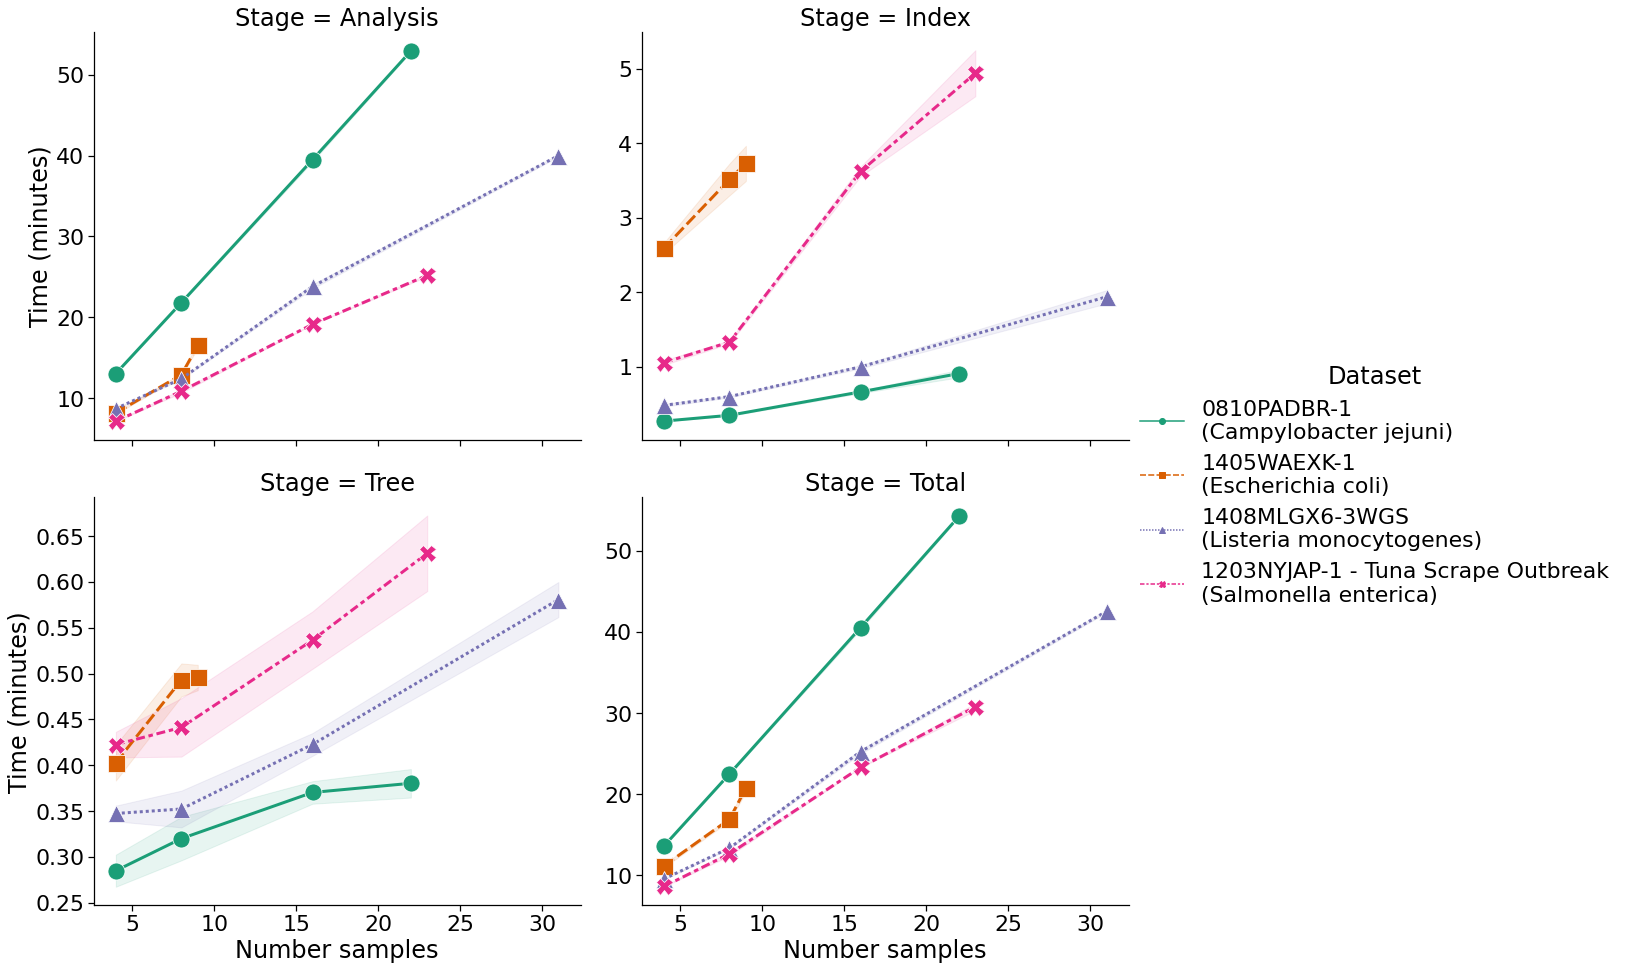

In [136]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Time (minutes)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_runtime_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-runtime.pdf')

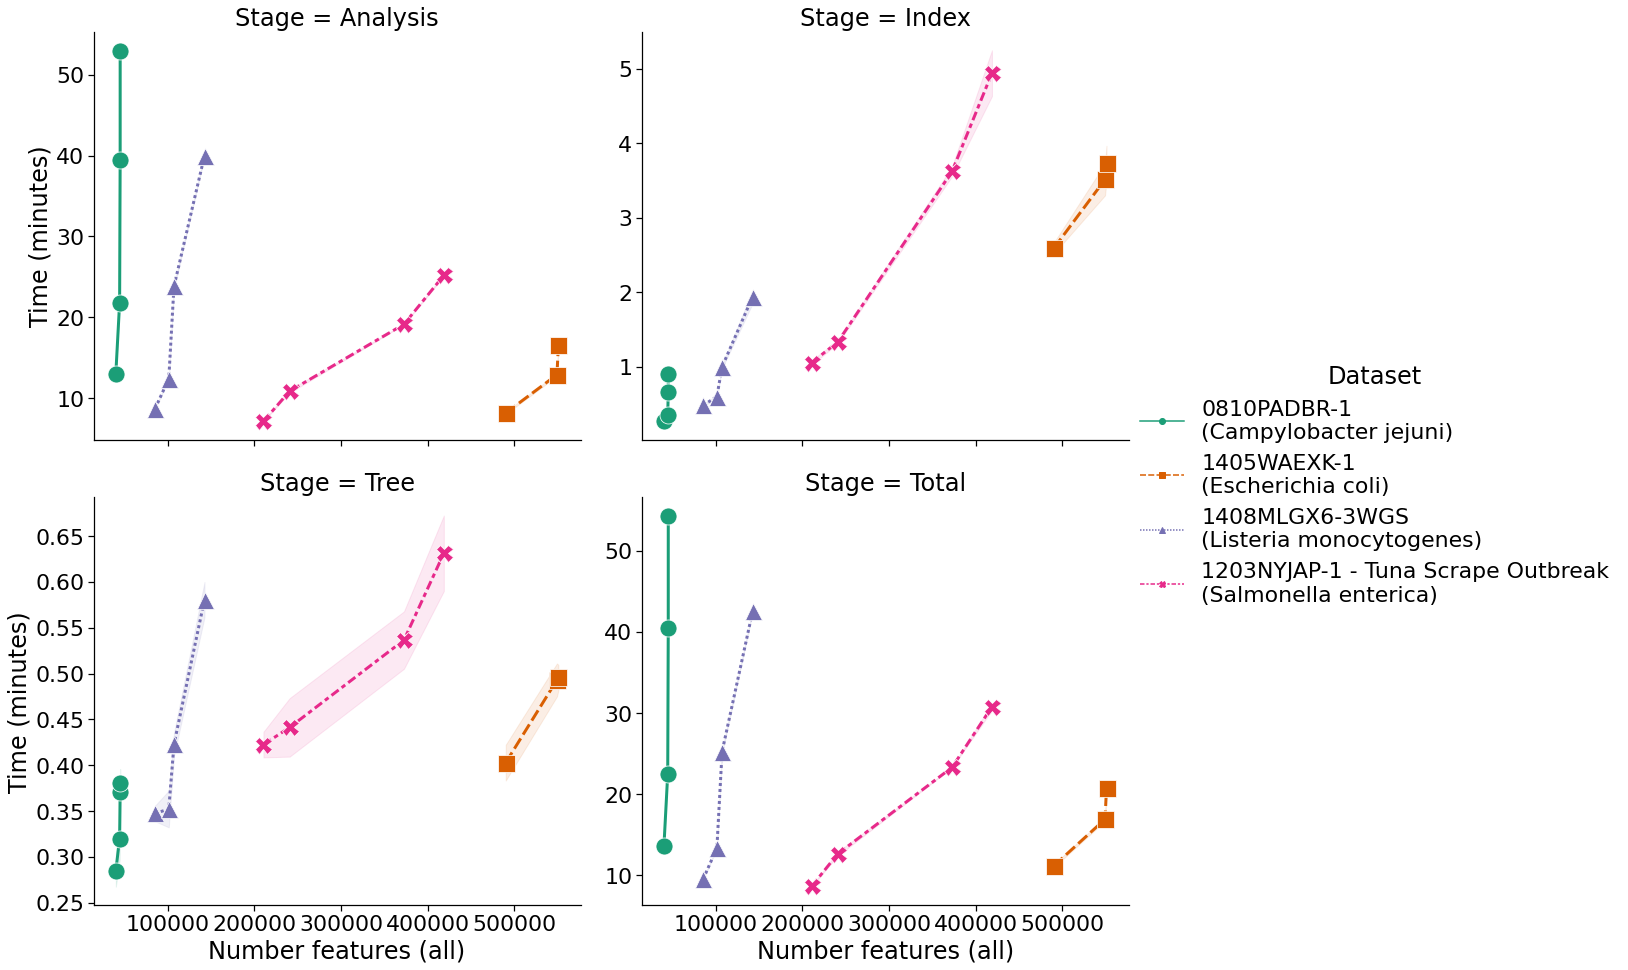

In [141]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number features (all)', y='Time (minutes)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_runtime_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-runtime-features-no-unknown.pdf')

#### 2.1.2.3. Mean/stdevs

In [142]:
index_info_runtime_df[['Dataset', 'Stage', 'Number samples', 'Time (minutes)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Time (minutes)  \
                                                                                     mean   
Dataset                                            Number samples Stage                     
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis      13.037167   
                                                                  Index          0.268056   
                                                                  Total         13.590111   
                                                                  Tree           0.284889   
                                                   8              Analysis      21.817833   
                                                                  Index          0.345778   
                                                                  Total         22.483556   
                                                                  Tree           0.319944   
                                                   16             Analysis      39.510444   
                                                                  Index          0.660500   
                                                                  Total         40.541222   
                                                                  Tree           0.370278   
                                                   22             Analysis      52.963444   
                                                                  Index          0.906278   
                                                                  Total         54.250000   
                                                                  Tree           0.380278   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis       7.132389   
                                                                  Index          1.053111   
                                                                  Total          8.608000   
                                                                  Tree           0.422500   
                                                   8              Analysis      10.858611   
                                                                  Index          1.329611   
                                                                  Total         12.629500   
                                                                  Tree           0.441278   
                                                   16             Analysis      19.135889   
                                                                  Index          3.621333   
                                                                  Total         23.293778   
                                                                  Tree           0.536556   
                                                   23             Analysis      25.193889   
                                                                  Index          4.939944   
                                                                  Total         30.765111   
                                                                  Tree           0.631278   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis       8.157389   
                                                                  Index          2.589722   
                                                                  Total         11.149889   
                                                                  Tree           0.402778   
                                                   8              Analysis      12.890056   
                                                                  Index          3.513167   
                                                                  Total         16.896278   
                                                                  Tree           0.493056   
                                                   9              Analysis  

## 2.2. Memory plots

In [149]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
        
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Dataset', 'Number features (no unknown)',
                                                           'Number samples', 'Reference length'])
index_info_memory_df

,Name,Dataset,Number features (no unknown),Number samples,Reference length,Stage,Peak Memory (GB),Reference length (Mbp)
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.945530,1.634890
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.936184,1.634890
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.918362,1.634890
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),1092,8,1634890,Analysis,9.942890,1.634890
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),1092,8,1634890,Analysis,9.841484,1.634890
...,...,...,...,...,...,...,...,...
130,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,151,16,4808805,Tree,0.970222,4.808805
131,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,151,16,4808805,Tree,0.970314,4.808805
132,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,165,23,4808805,Tree,1.243538,4.808805
133,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,165,23,4808805,Tree,1.243515,4.808805


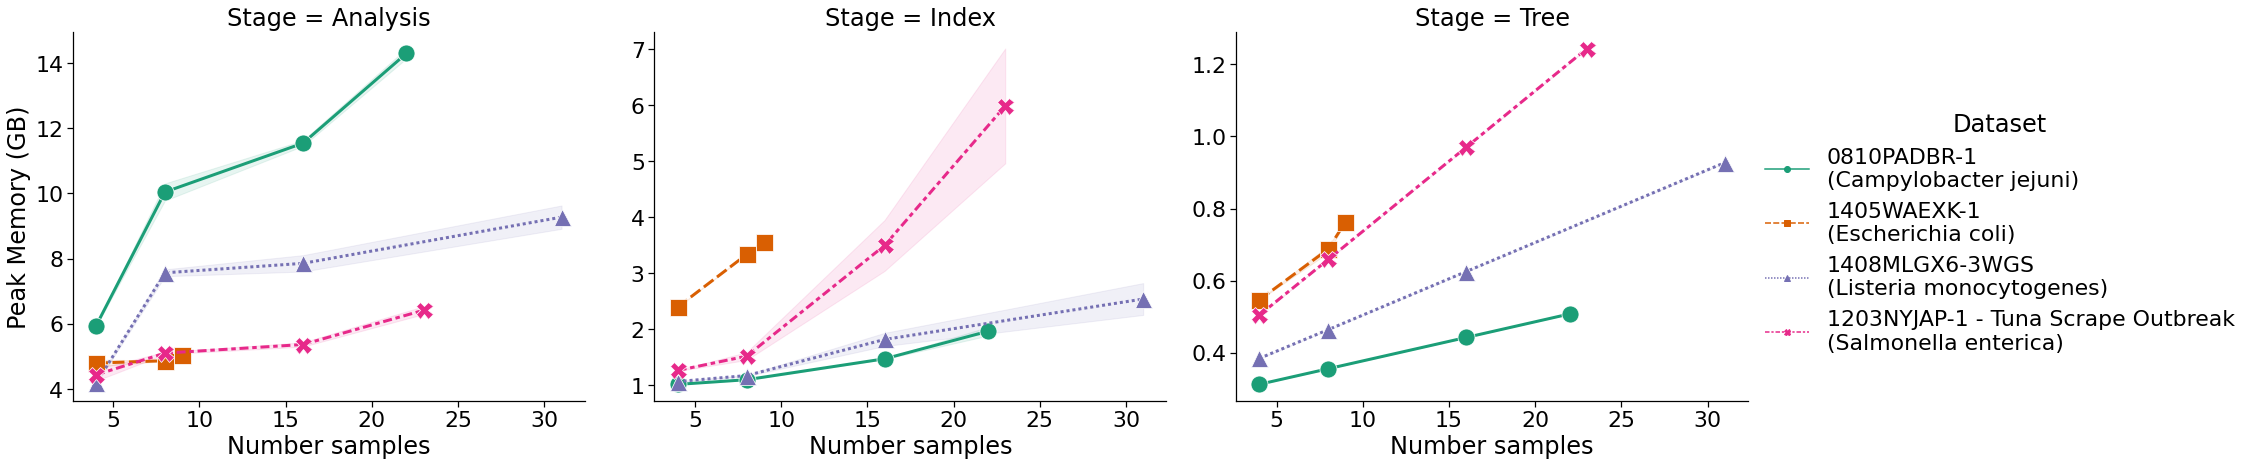

In [150]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

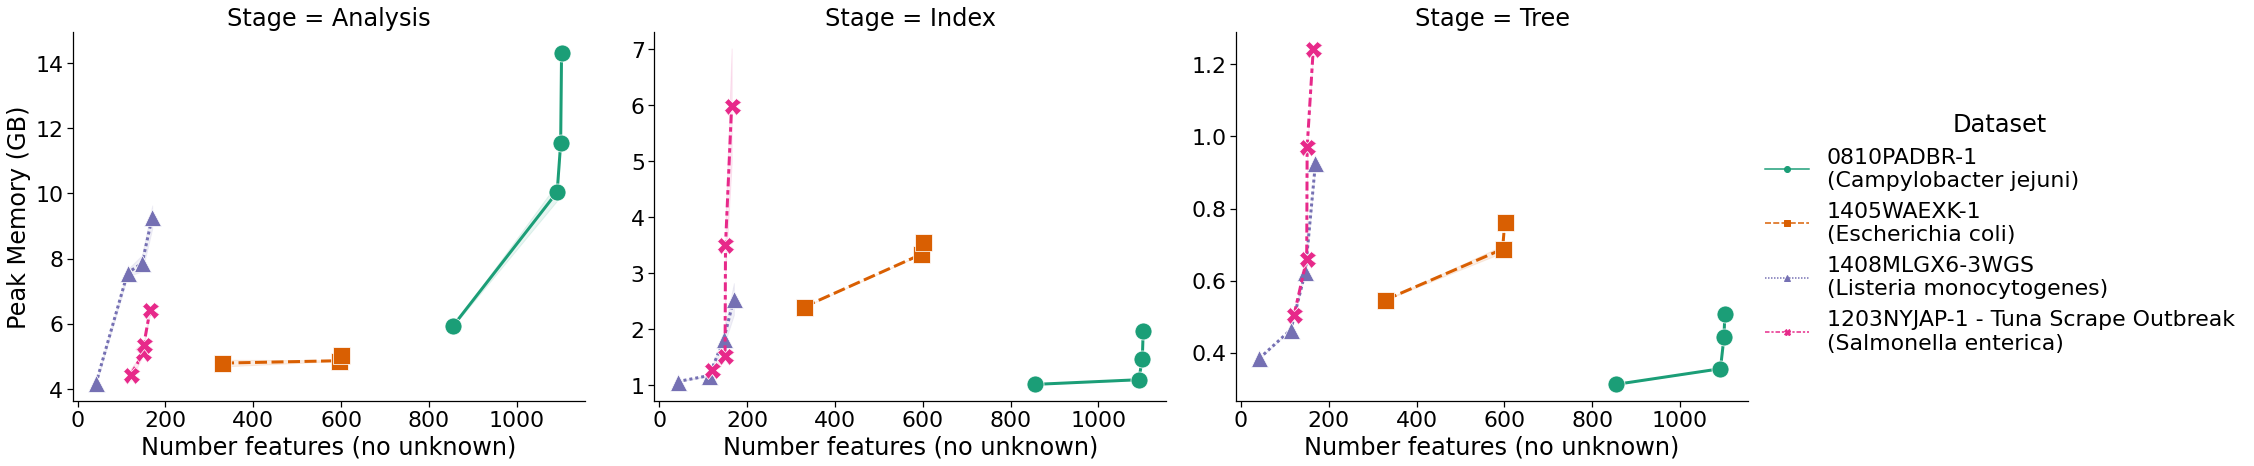

In [151]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number features (no unknown)', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

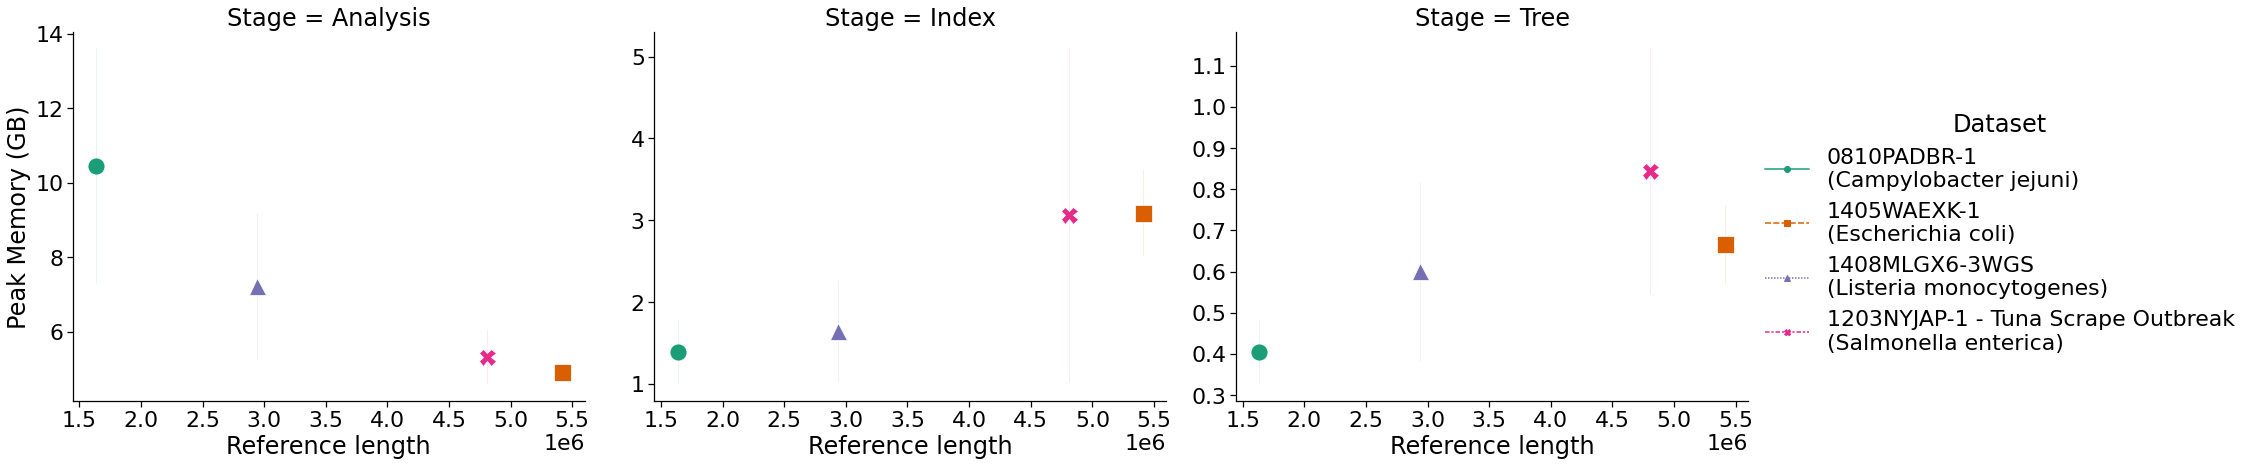

In [152]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Reference length', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [155]:
index_info_memory_df[['Dataset', 'Number samples', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Peak Memory (GB)  \
                                                                                       mean   
Dataset                                            Number samples Stage                       
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis         5.933359   
                                                                  Index            1.011066   
                                                                  Tree             0.312496   
                                                   8              Analysis        10.041862   
                                                                  Index            1.094536   
                                                                  Tree             0.355769   
                                                   16             Analysis        11.537782   
                                                                  Index            1.467871   
                                                                  Tree             0.442482   
                                                   22             Analysis        14.291066   
                                                                  Index            1.959923   
                                                                  Tree             0.507744   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis         4.434222   
                                                                  Index            1.259375   
                                                                  Tree             0.504391   
                                                   8              Analysis         5.100440   
                                                                  Index            1.515475   
                                                                  Tree             0.658890   
                                                   16             Analysis         5.364473   
                                                                  Index            3.492201   
                                                                  Tree             0.970108   
                                                   23             Analysis         6.415507   
                                                                  Index            5.986331   
                                                                  Tree             1.243735   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis         4.794272   
                                                                  Index            2.392865   
                                                                  Tree             0.546706   
                                                   8              Analysis         4.867841   
                                                                  Index            3.331860   
                                                                  Tree             0.687449   
                                                   9              Analysis         5.041630   
                                                                  Index            3.547512   
                                                                  Tree             0.763329   
1408MLGX6-3WGS\n(Listeria monocytogenes)           4              Analysis         4.169486   
                                                                  Index            1.061606   
                                                                  Tree             0.384338   
                                                   8              Analysis         7.564170   
                                                                  Index            1.168900   
                                                                  Tree             0.464165   
                                                   16             Analysis         7.

## 2.3. Disk usage plots

In [159]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()   
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Dataset',
                                                             'Number samples', 'Reference length'])
index_info_disk_df

,Name,Dataset,Number samples,Reference length,Stage,Disk (MB),Reference length (Mbp)
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.144531,1.634890
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.148438,1.634890
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.132812,1.634890
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),8,1634890,Analysis,6972.957031,1.634890
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),8,1634890,Analysis,6972.945312,1.634890
...,...,...,...,...,...,...,...
85,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,16,4808805,Index,62.511719,4.808805
86,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,16,4808805,Index,63.046875,4.808805
87,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,23,4808805,Index,73.984375,4.808805
88,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,23,4808805,Index,73.593750,4.808805


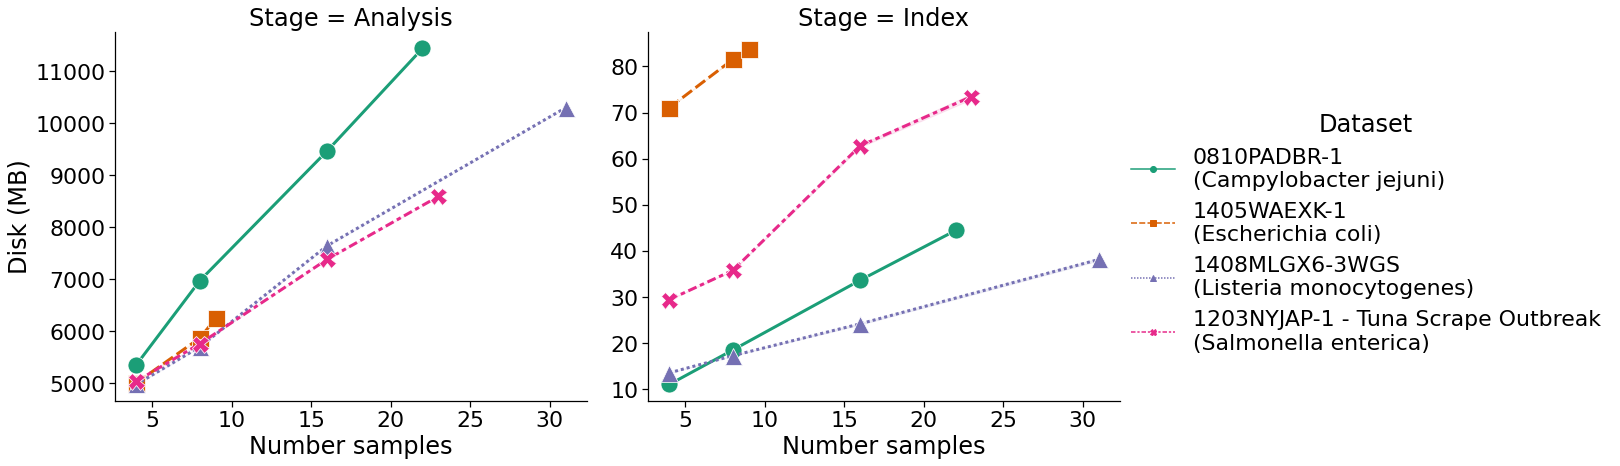

In [162]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Disk (MB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_disk_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [164]:
index_info_disk_df[['Dataset', 'Number samples', 'Stage', 'Disk (MB)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Disk (MB)  \
                                                                                    mean   
Dataset                                            Number samples Stage                    
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis   5351.141927   
                                                                  Index        11.039062   
                                                   8              Analysis   6972.954427   
                                                                  Index        18.519531   
                                                   16             Analysis   9468.496094   
                                                                  Index        33.640625   
                                                   22             Analysis  11442.511719   
                                                                  Index        44.434896   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis   5035.611979   
                                                                  Index        29.433594   
                                                   8              Analysis   5760.180990   
                                                                  Index        35.785156   
                                                   16             Analysis   7382.967448   
                                                                  Index        62.776042   
                                                   23             Analysis   8594.183594   
                                                                  Index        73.468750   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis   5006.256510   
                                                                  Index        71.053385   
                                                   8              Analysis   5868.945312   
                                                                  Index        81.541667   
                                                   9              Analysis   6246.947917   
                                                                  Index        83.820312   
1408MLGX6-3WGS\n(Listeria monocytogenes)           4              Analysis   4975.930990   
                                                                  Index        13.555990   
                                                   8              Analysis   5698.148438   
                                                                  Index        17.273438   
                                                   16             Analysis   7644.519531   
                                                                  Index        24.190104   
                                                   31             Analysis  10302.063802   
                                                                  Index        38.141927   

                                                                                      \
                                                                                 std   
Dataset                                            Number samples Stage                
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis  0.008132   
                                                                  Index     0.010335   
                                                   8              Analysis  0.008132   
                                                                  Index     0.011719   
                                                   16             Analysis  0.025615   
                                                                  Index     0.017027   
                                                   22             Analysis  0.013532   
                                                                  Index     0.117274   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis